In [58]:


import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
warnings.filterwarnings('ignore')
data = pd.read_csv('./input/insurance.csv')



In [50]:
data.head()

,age,sex,bmi,children,smoker,region,charges,isSouthwest,isSoutheast,isNorthwest,isNortheast
0,19,0,27.900,0,1,southwest,16884.92400,1.0,0.0,0.0,0.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,1.0,0.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,1.0,0.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,0.0,1.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,0.0,1.0,0.0


Adjust string features

In [59]:
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
# region
# le.fit(data.region.drop_duplicates()) 
# data.region = le.transform(data.region)

# oneHot = OneHotEncoder()
# oneHot.fit(data.region.drop_duplicates())
# data.region = oneHot.transform(data.region)

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [5])], remainder='passthrough')
dataset = columnTransformer.fit_transform(data)


Add hotencoder to collumns

In [60]:
print(dataset[0:5,:])

print(data.region.drop_duplicates())
data["isSouthwest"] = dataset[:,3]
data["isSoutheast"] = dataset[:, 2]
data["isNorthwest"] = dataset[:, 1]
data["isNortheast"] = dataset[:, 0]



[[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.90000000e+01 0.00000000e+00 2.79000000e+01 0.00000000e+00
  1.00000000e+00 1.68849240e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  1.80000000e+01 1.00000000e+00 3.37700000e+01 1.00000000e+00
  0.00000000e+00 1.72555230e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  2.80000000e+01 1.00000000e+00 3.30000000e+01 3.00000000e+00
  0.00000000e+00 4.44946200e+03]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  3.30000000e+01 1.00000000e+00 2.27050000e+01 0.00000000e+00
  0.00000000e+00 2.19844706e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  3.20000000e+01 1.00000000e+00 2.88800000e+01 0.00000000e+00
  0.00000000e+00 3.86685520e+03]]
0    southwest
1    southeast
3    northwest
8    northeast
Name: region, dtype: object


Correlation with features

<AxesSubplot:>

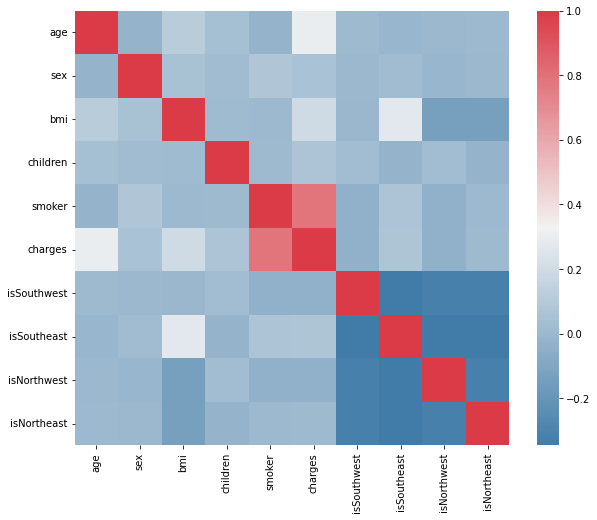

In [61]:
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

Plot stuff

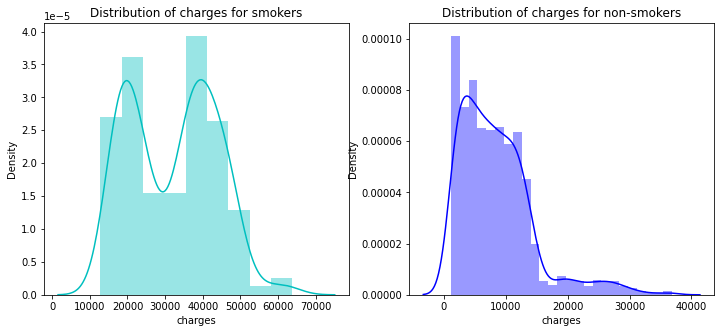

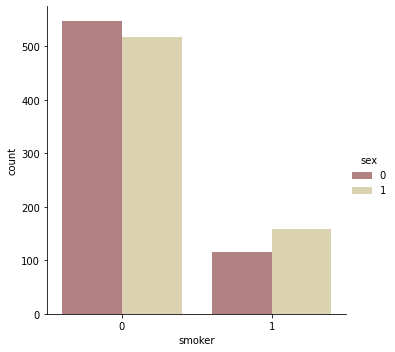

In [62]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)